# ML1 Project: Distinguishing Between a Signal Processes 📶

#### *Joseph Ben | Nov 2021*

## About
The problem is a classification problem which distinguishes between a signal process which produces supersymmetric particles and a background process which does not. The first 8 features are kinematic properties measured by the particle detectors in the accelerator. The last ten features are functions of the first 8 features; these are high-level features derived by physicists to help discriminate between the two classes. Class 0 represents the background and class 1 represents the signal. 

In [61]:
#0 Importing the necessary header files.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    # Train-test
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
    # Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

    # Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [62]:
#2 Loading the train csv as pandas dataframe.
signal_df = pd.read_csv("/content/drive/MyDrive/train.csv")
print(signal_df)

         Unnamed: 0  lepton_1_pT  lepton_1_eta  ...  dPhi_r_b  cos(theta_r1)  class
0                 0     0.841381      1.832647  ...  0.461542       0.005710    0.0
1                 1     0.663798      2.058290  ...  1.455247       0.101246    0.0
2                 2     1.792225     -1.099978  ...  0.721326       0.613326    1.0
3                 3     0.893018      0.297782  ...  0.803802       0.038902    0.0
4                 4     1.338997      0.350023  ...  0.717237       0.003147    1.0
...             ...          ...           ...  ...       ...            ...    ...
3499995     3499995     1.052621      0.602641  ...  1.203800       0.056984    1.0
3499996     3499996     0.624401      0.361025  ...  1.075939       0.640265    0.0
3499997     3499997     0.719730     -0.655623  ...  1.242062       0.262156    1.0
3499998     3499998     0.670955     -0.450620  ...  0.502427       0.198597    0.0
3499999     3499999     0.665091      1.751356  ...  1.238222       0.449188

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
signal_df = signal_df.sample(frac=0.55)

In [42]:
#3 Understanding the dimensions of our dataset.
print(signal_df.shape)
print(signal_df.columns)


(2450000, 20)
Index(['Unnamed: 0', 'lepton_1_pT', 'lepton_1_eta', 'lepton_1_phi',
       'lepton_2_pT', 'lepton_2_eta', 'lepton_2_phi',
       'missing_energy_magnitude', 'missing_energy_phi', 'MET_rel',
       'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R',
       'dPhi_r_b', 'cos(theta_r1)', 'class'],
      dtype='object')


In [43]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2450000 entries, 2467439 to 654058
Data columns (total 20 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0                int64  
 1   lepton_1_pT               float64
 2   lepton_1_eta              float64
 3   lepton_1_phi              float64
 4   lepton_2_pT               float64
 5   lepton_2_eta              float64
 6   lepton_2_phi              float64
 7   missing_energy_magnitude  float64
 8   missing_energy_phi        float64
 9   MET_rel                   float64
 10  axial_MET                 float64
 11  M_R                       float64
 12  M_TR_2                    float64
 13  R                         float64
 14  MT2                       float64
 15  S_R                       float64
 16  M_Delta_R                 float64
 17  dPhi_r_b                  float64
 18  cos(theta_r1)             float64
 19  class                     float64
dtypes: float64(19), int

In [44]:
signal_df.describe()

,Unnamed: 0,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),class
count,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06,2.450000e+06
mean,1.749887e+06,1.000395e+00,7.922618e-04,9.092581e-04,9.994762e-01,6.799401e-04,-3.637827e-04,9.993327e-01,-3.600064e-04,1.000594e+00,6.701236e-05,1.000404e+00,9.995254e-01,9.996929e-01,1.000193e+00,1.000056e+00,9.997632e-01,9.995252e-01,2.247812e-01,4.573253e-01
std,1.010058e+06,6.871259e-01,1.002898e+00,1.002066e+00,6.544509e-01,1.002582e+00,1.001172e+00,8.715471e-01,1.001642e+00,8.888310e-01,1.000605e+00,6.287648e-01,5.831559e-01,4.710624e-01,8.590089e-01,6.205886e-01,6.232858e-01,4.360784e-01,1.969354e-01,4.981756e-01
min,0.000000e+00,2.548815e-01,-2.102919e+00,-1.734789e+00,4.285860e-01,-2.059306e+00,-1.734202e+00,7.199480e-04,-1.727112e+00,7.693475e-08,-1.470644e+01,2.680643e-01,2.427395e-03,4.528082e-03,0.000000e+00,2.734135e-02,4.452858e-03,4.329373e-07,2.113790e-07,0.000000e+00
25%,8.757928e+05,5.624875e-01,-7.559830e-01,-8.668997e-01,5.969710e-01,-7.684770e-01,-8.678068e-01,4.783166e-01,-8.665152e-01,3.687484e-01,-4.922235e-01,5.883682e-01,6.224536e-01,6.502945e-01,1.711036e-01,5.985243e-01,5.134083e-01,6.877557e-01,6.912067e-02,0.000000e+00
50%,1.749792e+06,7.916338e-01,9.023923e-04,2.125447e-04,7.998958e-01,5.491294e-04,-7.992858e-04,7.737322e-01,-9.890026e-03,8.016732e-01,-8.016474e-02,8.286080e-01,8.779684e-01,9.339889e-01,9.015112e-01,8.354233e-01,9.137152e-01,1.094500e+00,1.670360e-01,0.000000e+00
75%,2.623959e+06,1.204710e+00,7.582137e-01,8.688376e-01,1.162060e+00,7.700310e-01,8.665297e-01,1.206601e+00,8.680169e-01,1.374737e+00,3.490837e-01,1.211204e+00,1.220032e+00,1.283023e+00,1.612161e+00,1.207948e+00,1.383732e+00,1.369229e+00,3.300130e-01,1.000000e+00
max,3.499998e+06,2.055345e+01,2.101605e+00,1.734839e+00,3.303562e+01,2.059721e+00,1.734686e+00,2.106888e+01,1.740689e+00,2.256248e+01,1.959220e+01,2.107572e+01,1.499274e+01,6.731210e+00,1.698424e+01,2.115226e+01,1.344306e+01,1.591660e+00,1.000000e+00,1.000000e+00


In [64]:
#3 We need to remove "Unnamed: 0" column. We will then have only 19 columns.
signal_df = signal_df.drop('Unnamed: 0', 1)

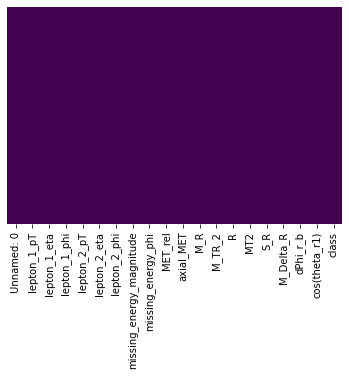

In [ ]:
#4 Checking for null values using seaborn.
sns.heatmap(signal_df.isnull(),yticklabels= False, cbar = False, cmap = "viridis") 

We can understand that there is no column with null values. So for now we are not deleting any of the rows.

In [ ]:
signal_df.all()

In [ ]:
#5 Removing rows with MT2 = 0  because it feels like a null value.
##signal_df.reset_index(drop = True, inplace=True)

                          lepton_1_pT  lepton_1_eta  ...  cos(theta_r1)     class
lepton_1_pT                  1.000000     -0.000250  ...       0.165773  0.387487
lepton_1_eta                -0.000250      1.000000  ...       0.000167 -0.000547
lepton_1_phi                -0.000300      0.000609  ...       0.000176 -0.001919
lepton_2_pT                  0.685146      0.000108  ...      -0.215938  0.194759
lepton_2_eta                 0.000034      0.403366  ...       0.000604  0.000403
lepton_2_phi                -0.000393      0.000077  ...      -0.001128 -0.000734
missing_energy_magnitude     0.383797     -0.000981  ...       0.426677  0.439027
missing_energy_phi          -0.000945      0.000171  ...       0.000713  0.001499
MET_rel                      0.160130     -0.000939  ...       0.317531  0.282488
axial_MET                   -0.016981     -0.000167  ...      -0.273787  0.077327
M_R                          0.851765     -0.000323  ...      -0.114898  0.267009
M_TR_2          

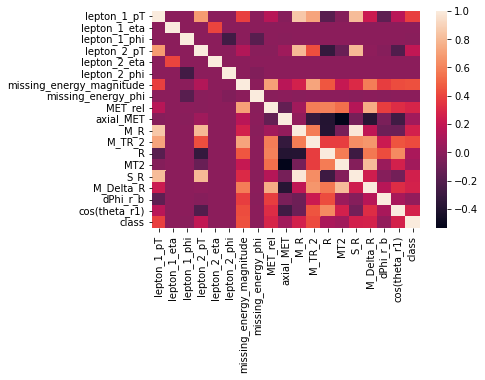

In [46]:
#6 Finding if any columns are correlated.
print(signal_df.corr())
sns.heatmap(signal_df.corr())

M_R and S_R seems highly correlated. So we need to include only one of them in training.

In [47]:
signal_df.columns


Index(['lepton_1_pT', 'lepton_1_eta', 'lepton_1_phi', 'lepton_2_pT',
       'lepton_2_eta', 'lepton_2_phi', 'missing_energy_magnitude',
       'missing_energy_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R',
       'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)', 'class'],
      dtype='object')

I am using a bagging MLP for my classification. Arrvied at the hyper paramters on my own intuition.Tried everything including random forest trees woth Grid Search CV and finding the hyper parameters. Unable to cross the required Kaggle benchmark.

In [66]:
#6 Input and Output labels
X_train = signal_df[['lepton_1_pT', 'lepton_1_eta', 'lepton_1_phi', 'lepton_2_pT',
       'lepton_2_eta', 'lepton_2_phi', 'missing_energy_magnitude',
       'missing_energy_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R',
       'MT2', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']]
y_train = signal_df['class']

In [49]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [73]:
bag = BaggingClassifier(MLPClassifier(solver = "sgd", alpha = 1e-5, random_state=1, max_iter=200,
                          hidden_layer_sizes = 10), n_estimators = 8, 
                        bootstrap=True, n_jobs=-1, random_state=1, verbose = 1)
for (train,test), i in zip(cv.split(X_train, y_train), range(5)):
     bag.fit(X_train.iloc[train], y_train.iloc[train])

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed: 14.0min remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed: 14.0min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed: 13.6min remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed: 13.6min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed: 14.2min remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed: 14.2min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed: 13.9min remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed: 13.9min finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Don

In [75]:
test_signal_df = pd.read_csv("/content/drive/MyDrive/test.csv")


In [76]:
test_signal_df = test_signal_df.drop('Unnamed: 0', 1)
test_signal_df

,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
1,0.698336,1.689431,-1.134670,0.966594,1.503367,0.880949,0.242573,-0.228654,0.364132,0.109350,0.668554,0.489941,0.650313,0.683634,0.664825,0.510385,0.584092,0.031694
2,0.578286,-0.689652,-0.390094,0.480061,-0.632219,1.212005,0.640473,-1.622401,0.872160,-0.186169,0.451853,0.669288,1.314412,0.559444,0.491753,0.559017,1.286520,0.400292
3,0.798202,0.099358,-1.095839,0.531147,-0.962327,1.500362,1.273941,0.675408,1.803743,-0.845941,0.685836,1.234757,1.597630,1.864630,0.775854,1.556949,1.245781,0.538010
4,1.466649,0.115517,-1.036161,0.877247,0.690861,1.130069,0.890722,0.426515,1.283212,-0.563880,1.090046,1.327570,1.080762,1.588076,1.069615,1.258800,0.443045,0.415406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499995,0.482755,1.204410,0.299445,0.780271,1.958697,0.938929,0.887801,-1.404129,1.332697,-0.456543,0.551233,0.957969,1.542171,1.982478,0.579808,1.481396,1.006600,0.189843
1499996,1.085361,0.861342,-1.356951,0.483685,0.059381,0.292341,0.340940,0.761038,0.380255,0.038984,0.774140,0.660777,0.757443,0.331105,0.715807,0.447304,0.320159,0.371521
1499997,1.339252,-1.753881,0.667430,1.279321,-0.125801,-1.025262,0.996305,-1.425422,1.005658,-0.529824,1.616218,1.278956,0.702218,0.541788,1.649413,1.139551,1.256152,0.159157
1499998,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599


In [ ]:

X_test = test_signal_df[['lepton_1_pT', 'lepton_1_eta', 'lepton_1_phi', 'lepton_2_pT',
       'lepton_2_eta', 'lepton_2_phi', 'missing_energy_magnitude',
       'missing_energy_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R',
       'MT2', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']]
yhat = bag.predict(X_test)

In [78]:
my_submission = pd.DataFrame({'Id': test_signal_df.index, 'class': yhat})
my_submission.to_csv('submissionA3.csv', index = False)